In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [3]:
a = cv2.imread("C:/aaa.png")

In [14]:
a.item(100, 100, 2) # 점을 카피 해준다, *args라고 되어있는데 무조건 한개 이상은 집어 넣어야 한다.
# 정확하게 말하면 인덱싱에 가까운 애이다.

144

In [15]:
a[100, 100, 2] # 인덱싱이 더 쉽다. 아는 사람한테는...

144

### 점에 값을 할당하는 방식

In [16]:
a[100, 100, 2] = 100
a.itemset((100, 100, 2), 100)

### 그림 불러올 때, 없을 경우 (opencv vs PIL)

PIL은 결론적으로 말해서, 그리밍 없어도 잘 불러와진다.

In [20]:
if not cv2.imread('b.png'):
    raise IOError # 이런식으로 에러 방지하는 것이다. (실수도)

OSError: 

In [22]:
x = cv2.add(a, a)
np.max(x) # 이미지끼리 더했어도, 255가 넘어가는 것은 255로 해준다. 이것을 세츄에이션 연산이라고 한다.

255

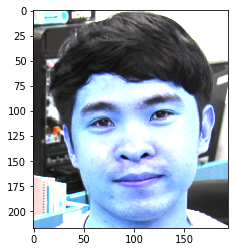

In [23]:
plt.imshow(x)

 - 255에서 멈추는 방식: 세츄에이션 방식
 - 넘어가면 0부터 다시 시작: 모듈러 방식

### 넘파이로 구현해보자.

모듈러 방식은 np.uint8로 처리해주면 된다. 넘파이는 기본적으로 모듈러 연산이다. (나머지 = mode)

 - 넘파이는 모듈러 방식이다.
 - cv2는 세츄에이션 방식이다.

In [35]:
img = 200 * np.ones((100, 100, 3), dtype = np.uint8)
img2 = np.full_like(img, 100, dtype = np.uint8)

In [36]:
img + img2 # 255를 넘어가면 255로 픽스되어야 하는데, 44가 되었다. 즉 모듈러 방식이다.

array([[[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       ...,

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]],

       [[44, 44, 44],
        [44, 44, 44],
        [44, 44, 44],
        ...,
        [44, 44, 44],
        [44, 44, 44],
        [44, 44, 44]]], dtype=uint8)

cv2에서 모듈러 방식을 적용하려면? -> 조건을 만들어버리면 된다.

기본적으로 넘파이는 더하기 (+) 연산을 해주면 넘파이를 해주면 된다. -> 그래서 cv2.add를 쓰면 된다.

In [39]:
cond = cv2.add(img,img2)

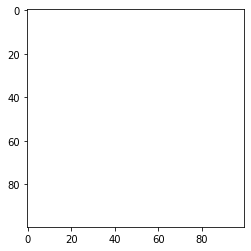

In [41]:
plt.imshow(cond)

### 히스토그램

---

여기까지가 기본이다. 색깔 히스토그램 해석하는 법

 - 너무 밝은 부분이 많으면 레벨을 조정한다.
 - 특정 색 정보가 많으면, 거기에 영향을 많이 받을 수 있다.

(array([3., 2., 1., 2., 1., 0., 0., 0., 0., 1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

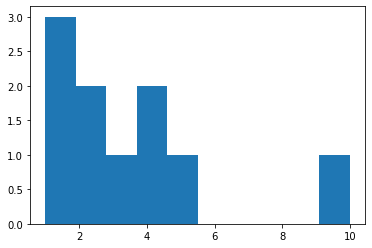

In [42]:
plt.hist([1, 1, 2, 3, 4, 10, 5, 4, 2, 1]) # 개수를 나타낸다.

쓰레시홀드 (thresh hold)

In [ ]:
cv2.threshold()

### max vs maximum

threshold: 127보다 크면 255로 바꿔라. 쓰레쉬홀드는 문턱이라고 한다.

In [49]:
# np.max([1, 2, 3, 4, 5]) # 인자로 1개만 받는다.
np.maximum([1, 2, 3], [2, 4, 7]) # 여러개 벡터 넣어도 된다.

# 둘

array([2, 4, 7])

### Threshold

흑백처리하기 위해 많이 쓴다. 컬러값 처리 못하면 이런식으로 바꿔줘야 한다. 그러면 흑백으로 바꿔줘야 하는데, 그러면 그레이 스케일로 바꿔서 차원을 낮춰야 한다.

In [50]:
[i for i in dir(cv2) if i.startswith('THRESH')]

['THRESH_BINARY',
 'THRESH_BINARY_INV',
 'THRESH_MASK',
 'THRESH_OTSU',
 'THRESH_TOZERO',
 'THRESH_TOZERO_INV',
 'THRESH_TRIANGLE',
 'THRESH_TRUNC']

In [88]:
cv2.THRESH_TRUNC

2

In [80]:
img = cv2.imread('C:/aaa.png')

In [81]:
retval, img = cv2.threshold(img, 127, # 쓰레쉬홀드값
                            255, cv2.THRESH_BINARY) # 125보다 크면 255로 바꿔라. 아닌 것들은 0

In [84]:
# 0이 몇 개인지 count하는 방법
x = img.flatten()
x

array([  0, 255,   0, ..., 255, 255, 255], dtype=uint8)

In [85]:
from collections import Counter

Counter(x) # 이런식으로 counter 모듈쓰면 쉽게 카운트 할 수 있다.

Counter({0: 92798, 255: 33496})

### np.where

In [66]:
a = np.array([1, 2, 3, 4, 5])

In [67]:
np.where(a>3, 3, 2)

array([2, 2, 2, 3, 3])

opencv 공부는 메뉴얼 공부 못한다. 일일이 확인해봐야 안 된다.

# 딥러닝에서 중요한 3가지

 - 데이터
 - 하드웨어
 - 알고리즘
 
지금 우리가 하는 것은 머신러닝의 성능을 높이기 위해서 사용하는 것이다.

그런데 쓰레시 홀드는 문제가 있다. 전체 기준으로 디테일이 다 없어진다. 평균의 함정이다.

그래서 나온것이 adaptive treshold다. 또 ots 방법도 있는데, 디테일을 살려주면서 흑백으로 바꿔준다.

참고 - (CNN) fully connected, flatten하면 위치정보다 다 날라가는 문제점이 있다.

In [95]:
cv2.THRESH_OTSU
cv2.THRESH_BINARY_INV
cv2.THRESH_OTSU + cv2.THRESH_BINARY_INV # 이런방식으로 옵션을 주기도 하는데, 이 값은 고유값이다. 스위치 방식!

9

0이 있는 애들은 다 디폴트이다.0이 디폴트기 때문에, 0 + 2 + 4라고 하면 6인 것이다.

In [96]:
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret2, th2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1527: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'cv::threshold'


### resize

 - crop: 위치에 상관없는 경우. crop을 쓰면 된다. crop은 위치에 민감하다. 모퉁이에 조그많게 고양이가 있는 경우 crop을 써야 한다. 그래서 이건 자동화를 못하고, 하나하나 다 체크해야 한다.
 - resize: pooling 기법이다. 여러개 값 합쳐서 하나로 만드는 거니까. (맥스풀링) 남은 값들을 보관하는 방법은 인터폴레이션이라고 함.

In [130]:
im = Image.open('C:/aaa.png')

In [104]:
[i for i in dir(PIL) if i.startswith('INTER_')]

[]

In [101]:
[i for i in dir(plt) if i.startswith('INTER_')]

[]

In [ ]:
im.resize()

생각없이 resize를 쓰면, 모양이 정사각형으로 바뀌어서 이미지의 특징이 없어져버린다.

리사이즈 안되면 crop을 써야 한다. crop을 쓰기 위해선 비율이 비슷해야 한다.

In [ ]:
# a = cv2.resize(img, None, fx = )

In [116]:
x = np.array([1, 0])

In [114]:
s = np.sqrt(2) / 2

In [119]:
rotate_m = np.array([[0, 1],[-1, 0]])

array([[ 0,  0],
       [-1,  0]])

In [127]:
rotate_m * x.T

array([[ 0,  0],
       [-1,  0]])

In [ ]:
M = cv2.getRotationMatrix2D((cols/2)) # 이런게 잇다 ^^ 회전행렬!

이걸 왜 하냐? 얼굴 90도 돌려버리면 인식을 못하기 때문이다. 그래서 아예 돌려서 학습시키는 경우도 있기 때문에 이걸 알아야 한다.

In [129]:
[i for i in dir(Image) if i.startswith('ROTATE')] # opencv, PIL 비교해가면서 해봐라. 별로 없다.

['ROTATE_180', 'ROTATE_270', 'ROTATE_90']

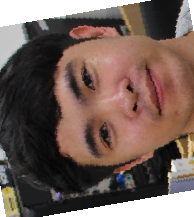

In [133]:
im.rotate(100)

데이터를 뻥튀기 하는 방법은 좌우반전이 가장 많이 쓰인다. (np.flip)

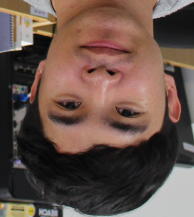

In [134]:
im.transpose(PIL.Image.FLIP_TOP_BOTTOM)

In [135]:
PIL.Image.FLIP_TOP_BOTTOM

1

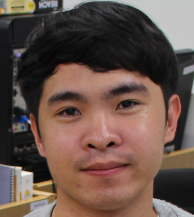

In [142]:
im

In [153]:
np.array([[0,0,1],[0,0,0]]).shape

(2, 3)

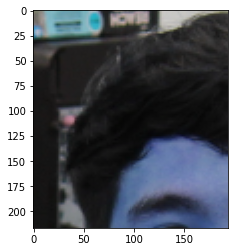

In [190]:
img = cv2.imread('C:/aaa.png')
rows, cols = img.shape[:2]
# M = np.array([[1,0,0],[0,1,0]], dtype = np.float32) # 그대로 (단위행렬)
# M = np.array([[1,0,30],[0,1,40]], dtype = np.float32) # 이동
M = np.array([[2,0,0],[0,2,0]], dtype = np.float32) # 확대/축소
plt.imshow(cv2.warpAffine(img, M, (cols, rows)));

wrapAffine 변환을 통해, 회전 좌우반전 이런거 다 할 수 있다.

공식문서에 보면 2번째 인자로, 2x3 transformation matrix라는게 있다. 2행 3열짜리 행렬인 것이다.

### 비트와이즈 연산

전공자들만 한두번 배운거다. 비트는 0과 1로만 이루어진 녀석. 이진수 기법쓴다.

&, |, ~ 기억하면 된다.

^는 Xor이다.

#### 투명하게 할 때 사용한다.

In [192]:
a = 0b111
b = 0b101

a & b # set에서 &는 교집합 -> and이다.
# 합집합은 | -> or 이다.

5

In [193]:
~a # 비트 낫, 반대로 바꾸는데 111 앞에 1이 있다고 가정하고 마이너스 붙이고, 나머지는 다 0으로 바꿔버린다.

-8

In [200]:
a = np.arange(10)
a[(a>3)&(a<5)] # 이럴때도 &를 썼다. 비트연산이고 True/False 연산할 때 쓴다.

array([4])

In [205]:
[i for i in dir(cv2) if i.startswith("bit")] # 채널마스킹 기법을 쓴다.

['bitwise_and', 'bitwise_not', 'bitwise_or', 'bitwise_xor']

In [207]:
# cv2.bitwise_not(mask)

### 이미지 색바꾸는 3가지

1. 넘파이 슬라이싱
2. 스플릿 -> 머지
3. cvtcolor